In [241]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.display.max_columns = 30
import pandas as pd
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import KFold

In [242]:
training_data = pd.read_csv("2_training_testing_80/New_training_data_19Jan2021_r.csv",sep=',',header=0)
testing_data = pd.read_csv("2_training_testing_80/new_Test_data_19Jan.csv",sep=',',header=0)
len(training_data)

883

In [243]:
# For training Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
training_data['Age_bins'] = pd.cut(training_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (training_data)

     Gender  Race  Ethnic Group    Encounter       Reason1       Reason2  \
0         1   0.0             1     57304086 -7.820000e-16  2.050000e-09   
1         0   0.0             0     59464001 -8.640000e-18  1.160000e-10   
2         1   1.0             0    306885119 -3.340000e-16  2.760000e-09   
3         1   1.0             0    843895334 -1.130000e-16  1.300000e-09   
4         0   1.0             0    964184337  5.560000e-17 -1.190000e-09   
..      ...   ...           ...          ...           ...           ...   
878       0   1.0             2  43280473142 -1.010000e-17 -4.370000e-12   
879       0   0.0             0  43600834323  1.000000e+00  1.450000e-15   
880       0   1.0             0  44604273292  3.800000e-17 -4.150000e-12   
881       0   0.0             0  46328314129  7.280000e-17 -1.850000e-11   
882       1   0.0             0  46642834260  1.000000e+00  1.450000e-15   

          Reason3       Reason4       Reason5       Reason6       Reason7  \
0    4.910

In [244]:
# For Testing Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
testing_data['Age_bins'] = pd.cut(testing_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (testing_data)

    Gender  Race  Ethnic Group    Encounter       Reason1       Reason2  \
0        1     1             2    892774098  1.000000e+00  5.660000e-16   
1        0     1             2   1930374269  1.000000e+00  5.660000e-16   
2        0     0             0   4090293179  1.000000e+00  1.450000e-15   
3        0     0             2   5394323197  1.000000e+00  1.450000e-15   
4        1     1             0   5903325002  1.000000e+00  1.450000e-15   
..     ...   ...           ...          ...           ...           ...   
75       1     6             2  50979275303  1.000000e+00  1.450000e-15   
76       1     0             0  50998165297  1.000000e+00  5.660000e-16   
77       1     0             0  51043285325  1.450000e-16 -3.320000e-10   
78       1     0             0  51360305347  1.000000e+00  1.450000e-15   
79       0     0             0  51362525349  1.000000e+00  1.450000e-15   

         Reason3       Reason4       Reason5       Reason6       Reason7  \
0   2.060000e-16 -9.200

In [245]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

training_data = clean_dataset(training_data)
testing_data = clean_dataset(testing_data)
#print (testing_data)

In [246]:
X_train = training_data[['Gender','Race','Ethnic Group','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_train = training_data[['Gender','Race','Ethnic Group','Age_bins']]
y_train = training_data['Class']
X_test = testing_data[['Gender','Race','Ethnic Group','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_test = testing_data[['Gender','Race','Ethnic Group','Age_bins']]
y_test = testing_data['Class']

In [247]:
# Define the K-fold Cross Validator
num_folds =10
kfold = KFold(n_splits=num_folds, shuffle=True)

In [248]:
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
epochs = 50
fold_no = 1
for train, test in kfold.split(X_train, y_train):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(units = 100 , activation = 'relu' , input_dim = X_train.shape[1]))
  model.add(Dense(units = 50 , activation = 'relu'))
  model.add(Dense(units = 25 , activation = 'relu'))
  model.add(Dense(units = 10 , activation = 'relu'))
  #model.add(Dense(units = 2 , activation = 'softmax'))
  model.add(Dense(units = 1 , activation = 'sigmoid'))
  #loss_fn = keras.losses.SparseCategoricalCrossentropy()
  loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0, reduction="auto", name="binary_crossentropy")
  model.compile(optimizer = 'adam' , loss = loss_fn , metrics = ['accuracy'])
  model.summary()

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # Fit data to model
  history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = epochs)

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_661 (Dense)            (None, 100)               2500      
_________________________________________________________________
dense_662 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_663 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_664 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_665 (Dense)            (None, 1)                 11        
Total params: 9,096
Trainable params: 9,096
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Train on 880 sample

880/880 [==============================] - 0s 257us/step - loss: 0.4847 - accuracy: 0.7250 - val_loss: 1.1804 - val_accuracy: 0.5375
Epoch 48/50
880/880 [==============================] - 0s 250us/step - loss: 0.4800 - accuracy: 0.7398 - val_loss: 1.2202 - val_accuracy: 0.5375
Epoch 49/50
880/880 [==============================] - 0s 257us/step - loss: 0.4772 - accuracy: 0.7352 - val_loss: 1.2686 - val_accuracy: 0.5125
Epoch 50/50
880/880 [==============================] - 0s 261us/step - loss: 0.4878 - accuracy: 0.7250 - val_loss: 1.2253 - val_accuracy: 0.5250
Score for fold 2: loss of 1.2253441095352173; accuracy of 52.49999761581421%
Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_671 (Dense)            (None, 100)               2500      
_________________________________________________________________
dense_672 (Dense)            (None, 50)                5050      
_

880/880 [==============================] - 0s 284us/step - loss: 0.5072 - accuracy: 0.7239 - val_loss: 1.0441 - val_accuracy: 0.4625
Epoch 44/50
880/880 [==============================] - 0s 288us/step - loss: 0.5052 - accuracy: 0.7250 - val_loss: 1.1084 - val_accuracy: 0.5000
Epoch 45/50
880/880 [==============================] - 0s 280us/step - loss: 0.4951 - accuracy: 0.7352 - val_loss: 1.1038 - val_accuracy: 0.5250
Epoch 46/50
880/880 [==============================] - 0s 283us/step - loss: 0.4890 - accuracy: 0.7330 - val_loss: 1.1241 - val_accuracy: 0.4625
Epoch 47/50
880/880 [==============================] - 0s 283us/step - loss: 0.4808 - accuracy: 0.7375 - val_loss: 1.0826 - val_accuracy: 0.5250
Epoch 48/50
880/880 [==============================] - 0s 281us/step - loss: 0.4913 - accuracy: 0.7193 - val_loss: 1.1106 - val_accuracy: 0.4875
Epoch 49/50
880/880 [==============================] - 0s 282us/step - loss: 0.4833 - accuracy: 0.7352 - val_loss: 1.1590 - val_accuracy: 0.52

880/880 [==============================] - 0s 288us/step - loss: 0.4988 - accuracy: 0.7148 - val_loss: 1.0174 - val_accuracy: 0.5000
Epoch 40/50
880/880 [==============================] - 0s 286us/step - loss: 0.4971 - accuracy: 0.7352 - val_loss: 0.9848 - val_accuracy: 0.5250
Epoch 41/50
880/880 [==============================] - 0s 287us/step - loss: 0.5003 - accuracy: 0.7250 - val_loss: 1.0474 - val_accuracy: 0.4875
Epoch 42/50
880/880 [==============================] - 0s 288us/step - loss: 0.5036 - accuracy: 0.7205 - val_loss: 1.0840 - val_accuracy: 0.5125
Epoch 43/50
880/880 [==============================] - 0s 286us/step - loss: 0.4895 - accuracy: 0.7295 - val_loss: 1.0765 - val_accuracy: 0.5375
Epoch 44/50
880/880 [==============================] - 0s 287us/step - loss: 0.4871 - accuracy: 0.7307 - val_loss: 1.0348 - val_accuracy: 0.5125
Epoch 45/50
880/880 [==============================] - 0s 288us/step - loss: 0.4819 - accuracy: 0.7375 - val_loss: 1.0698 - val_accuracy: 0.55

880/880 [==============================] - 0s 287us/step - loss: 0.5362 - accuracy: 0.7091 - val_loss: 1.0982 - val_accuracy: 0.4625
Epoch 36/50
880/880 [==============================] - 0s 291us/step - loss: 0.5251 - accuracy: 0.7250 - val_loss: 1.3180 - val_accuracy: 0.4875
Epoch 37/50
880/880 [==============================] - 0s 287us/step - loss: 0.5234 - accuracy: 0.7261 - val_loss: 1.2105 - val_accuracy: 0.4875
Epoch 38/50
880/880 [==============================] - 0s 288us/step - loss: 0.5240 - accuracy: 0.7125 - val_loss: 1.1856 - val_accuracy: 0.4625
Epoch 39/50
880/880 [==============================] - 0s 289us/step - loss: 0.5214 - accuracy: 0.7205 - val_loss: 1.2898 - val_accuracy: 0.5000
Epoch 40/50
880/880 [==============================] - 0s 296us/step - loss: 0.5322 - accuracy: 0.7011 - val_loss: 1.5693 - val_accuracy: 0.5375
Epoch 41/50
880/880 [==============================] - 0s 290us/step - loss: 0.5226 - accuracy: 0.7205 - val_loss: 1.3349 - val_accuracy: 0.48

880/880 [==============================] - 0s 299us/step - loss: 0.5332 - accuracy: 0.6977 - val_loss: 0.8804 - val_accuracy: 0.4625
Epoch 32/50
880/880 [==============================] - 0s 294us/step - loss: 0.5243 - accuracy: 0.7239 - val_loss: 0.8882 - val_accuracy: 0.5250
Epoch 33/50
880/880 [==============================] - 0s 290us/step - loss: 0.5123 - accuracy: 0.7273 - val_loss: 0.9018 - val_accuracy: 0.5250
Epoch 34/50
880/880 [==============================] - 0s 295us/step - loss: 0.5122 - accuracy: 0.7148 - val_loss: 0.8895 - val_accuracy: 0.5000
Epoch 35/50
880/880 [==============================] - 0s 291us/step - loss: 0.5183 - accuracy: 0.7136 - val_loss: 0.9279 - val_accuracy: 0.5125
Epoch 36/50
880/880 [==============================] - 0s 300us/step - loss: 0.5044 - accuracy: 0.7205 - val_loss: 0.9156 - val_accuracy: 0.5250
Epoch 37/50
880/880 [==============================] - 0s 300us/step - loss: 0.5011 - accuracy: 0.7341 - val_loss: 0.9409 - val_accuracy: 0.53

In [249]:
# Save raw results Confusion Matrix
conf_scores_csv = pd.DataFrame({"acc_per_fold" : acc_per_fold, "loss_per_fold" : loss_per_fold})
conf_scores_csv.to_csv("Sensor_data_classification_demographic_comorbidity_Neural_Network_box_plot.csv", index=False)

In [250]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


80/80 [==============================] - 0s 318us/step
Test loss: 1.1304893970489502
Test accuracy: 0.5249999761581421


In [251]:
predictions = model.predict(X_test)     
#predictions = np.argmax(predictions, axis = 1) # We take the highest probability
#predictions

In [252]:
# For Random Forest and Logistoc Regression
#Pred_score = model.predict_proba(X_test)
#Pred_score = Pred_score.ravel().tolist()
#len(Pred_score)
#res = pd.DataFrame(Pred_score)
#res.index = X_test.index # its important for comparison
#res.columns = ["Sepsis","Non-Sepsis"]
#res.to_csv("sxore_xx.csv")
#res.to_csv("lateFusion_results_4hr_36000samples_1Dec.csv")

In [253]:
#res = pd.DataFrame(y_pred)
#res.index = X_test.index # its important for comparison
#res.columns = ["Sepsis","Non-Sepsis"]
#res.to_csv("prediction_Demo_Reason_results_19Jan2021.csv")

In [254]:
#history_dict = history.history
#print(history_dict.keys())

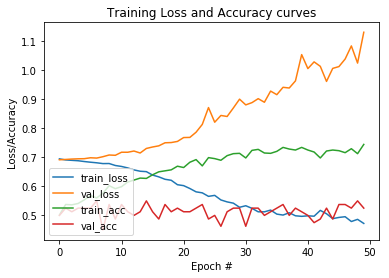

In [255]:
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy curves")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.show()
#plt.clf()

In [269]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
# Generate a classification report
report = classification_report(y_pred.round(), y_test, target_names=['Sepsis(0)','Non-Sepsis(1)'])
#report = classification_report(y_pred, y_test, target_names=['Sepsis(0)','Non-Sepsis(1)'])

print(report)

               precision    recall  f1-score   support

    Sepsis(0)       0.62      0.52      0.57        48
Non-Sepsis(1)       0.42      0.53      0.47        32

     accuracy                           0.53        80
    macro avg       0.53      0.53      0.52        80
 weighted avg       0.55      0.53      0.53        80



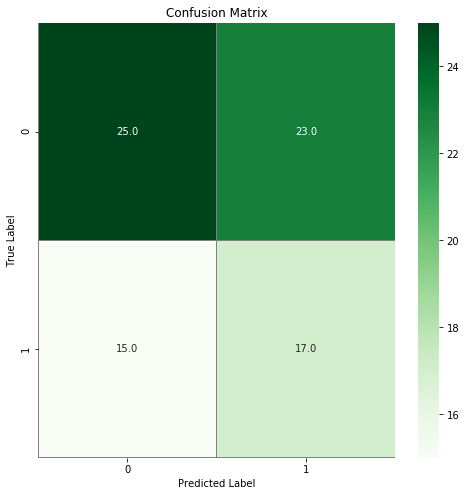

In [270]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_pred.round(), y_test) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [271]:
y_pred = y_pred.ravel().tolist()
# Save raw results Confusion Matrix
conf_scores_csv = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
conf_scores_csv.to_csv("Sensor_data_classification_demographic_comorbidity_Neural_Network_confusion_matrix.csv", index=False)